 # Activity Example
 This is an example of how to use the activity module. It currently can
 calculate the activity of water and organic compounds in a mixture. It can
 also calculate the phase separation of the binary mixture.

 This is an implementation of the Binary Activity Theory (BAT) model
 developed in Gorkowski, K., Preston, T. C., & Zuend, A. (2019).
 Relative-humidity-dependent organic aerosol thermodynamics Via an efficient
 reduced-complexity model. Atmospheric Chemistry and Physics
 https://doi.org/10.5194/acp-19-13383-2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from particula.activity import binary_activity, phase_separation, species_density

## Activity Calculation

Define the parameters. The activity module will calculate the activity of
water and organic compounds in a mixture. It can also calculate the phase
separation of the binary mixture.

The activity module requires the following parameters:
organic mole fraction, density, molecular weight ratio 
[water/organic], and the density of the organic compound.

These are used by the `particula.activity.activity_coefficient` function to
calculate the water activity, the water activity coefficient, organic
activity, and the organic activity coefficient.


In [2]:
organic_mole_fraction = np.linspace(0.001, 1, 1000)


oxygen2carbon = 0.225
molar_mass_ratio = 18.016 / 100
density = species_density.organic_density_estimate(
    18.016 / molar_mass_ratio, oxygen2carbon)

activity_water, activity_organic, mass_water, mass_organic, gamma_water, gamma_organic = \
    binary_activity.activity_coefficients(
        molar_mass_ratio=molar_mass_ratio,
        organic_mole_fraction=organic_mole_fraction,
        oxygen2carbon=oxygen2carbon,
        density=density,
        functional_group=None,)

## Plotting the Activity and Phase Separation

Here we plot the activity of water and the activity of the organic compound
as a function of the organic mole fraction.

The phase separation or miscibility gap happens when either activity
is greater than 1.0. Or when there is non-monotonic behavior in the
activity curve. Both of these are shown in the plot below.

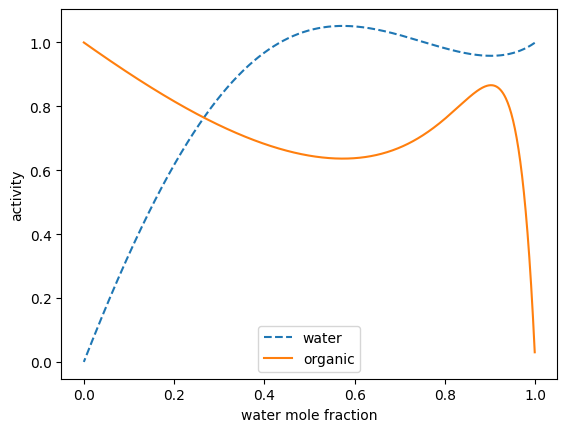

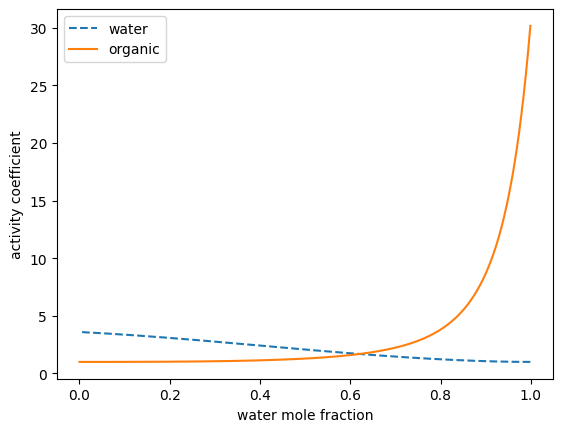

In [3]:
fig, ax = plt.subplots()
ax.plot(
    1 - organic_mole_fraction,
    activity_water,
    label="water",
    linestyle='dashed'
)
ax.plot(
    1 - organic_mole_fraction,
    activity_organic,
    label="organic",
)
ax.set_ylim()
ax.set_xlabel("water mole fraction")
ax.set_ylabel("activity")
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(
    1 - organic_mole_fraction,
    gamma_water,
    label="water",
    linestyle='dashed'
)
ax.plot(
    1 - organic_mole_fraction,
    gamma_organic,
    label="organic",
)
ax.set_ylim()
ax.set_xlabel("water mole fraction")
ax.set_ylabel("activity coefficient")
ax.legend()
plt.show()

## $q^{alpha}$

The q_alpha parameter represents the transition from a orgnaic rich phase
to a water rich phase. This can be found using the
`particula.activity.phase_separation` function, the `q_alpha` modele.

Plotted below is q_alpha for the previous activity calculation.

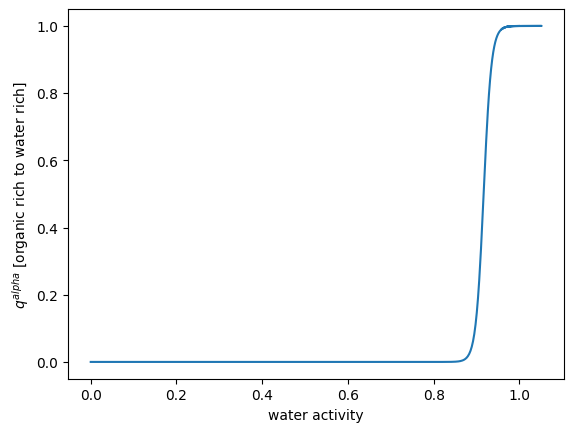

In [4]:
phase_sep_aw = phase_separation.find_phase_separation(
    activity_water, activity_organic)

q_alpha = phase_separation.q_alpha(
    seperation_activity=phase_sep_aw['upper_seperation'],
    activities=activity_water,
    )

fig, ax = plt.subplots()

plt.plot(activity_water, q_alpha)
plt.xlabel('water activity')
plt.ylabel('$q^{alpha}$ [organic rich to water rich]')
plt.show()

## Water Activity Focus

Now in typical atmospheric aerosol modeling, the water activity is the
important parameter and not mole fraction. As we can usually assume or control the water activity, and not the mole fractions of a solution. To use the water activity to get the mole fraction used to produce that water activity, we can use the `particula.activity.fixed_water_activity` function.

This function returns a tuples with three elements, one for the alpha phase (water rich), one for the beta phase (organic rich), and one of q_alpha. If there is no phase separation, then the alpha phase is the only phase, and the beta phase is None.

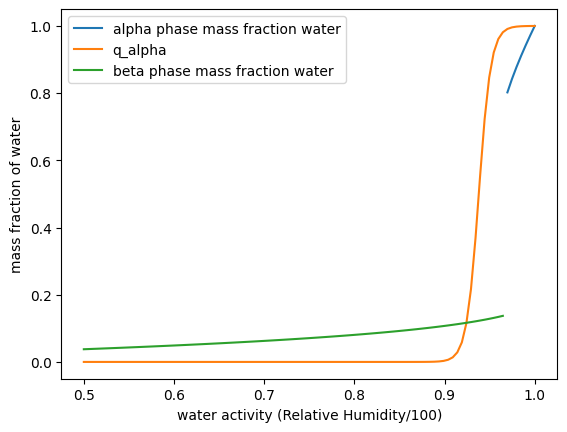

In [11]:
water_activity_desired = np.linspace(0.5, 1, 100)
oxygen2carbon = 0.25

alpha, beta, q_alpha = binary_activity.fixed_water_activity(
        water_activity=water_activity_desired,
        molar_mass_ratio=molar_mass_ratio,
        oxygen2carbon=oxygen2carbon,
        density=density
        )

fig, ax = plt.subplots()
ax.plot(
    water_activity_desired,
    alpha[2],
    label="alpha phase mass fraction water",
)
ax.plot(
        water_activity_desired,
        q_alpha,
        label="q_alpha",
        )
if beta is not None:
    ax.plot(
        water_activity_desired,
        beta[2],
        label="beta phase mass fraction water",
    )
ax.set_ylim()
ax.set_xlabel("water activity (Relative Humidity/100)")
ax.set_ylabel("mass fraction of water")
plt.legend()
plt.show()



Higher oxygen to carbon ratios will not phase separate, as shown below.

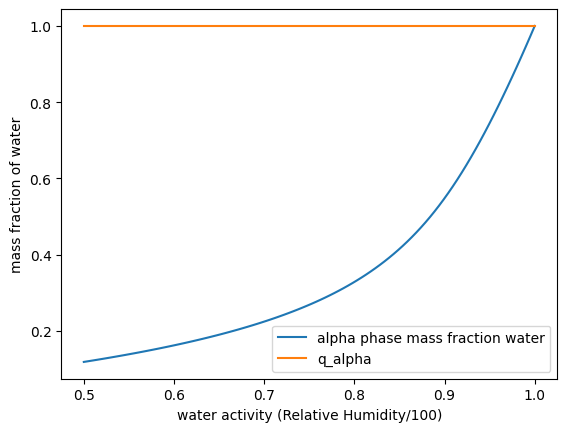

In [12]:
water_activity_desired = np.linspace(0.5, 1, 100)
oxygen2carbon = 0.6

alpha, beta, q_alpha = binary_activity.fixed_water_activity(
    water_activity=water_activity_desired,
    molar_mass_ratio=molar_mass_ratio,
    oxygen2carbon=oxygen2carbon,
    density=density
)

fig, ax = plt.subplots()
ax.plot(
    water_activity_desired,
    alpha[2],
    label="alpha phase mass fraction water",
)
ax.plot(
    water_activity_desired,
    q_alpha,
    label="q_alpha",
)
if beta is not None:
    ax.plot(
        water_activity_desired,
        beta[2],
        label="beta phase mass fraction water",
    )
ax.set_ylim()
ax.set_xlabel("water activity (Relative Humidity/100)")
ax.set_ylabel("mass fraction of water")
plt.legend()
plt.show()

# Summary

This is an example of how to use the activity module. It currently can
calculate the activity of water and organic compounds in a mixture. It can
also calculate the phase separation of the binary mixture. These outputs can be
used for aerosol thermodynamics, cloud condensation nuclei, and cloud
microphysics.

This is an implementation of the Binary Activity Theory (BAT) model
developed in Gorkowski, K., Preston, T. C., & Zuend, A. (2019).

In [10]:
help(binary_activity)

Help on module particula.activity.binary_activity in particula.activity:

NAME
    particula.activity.binary_activity - Binary activity coefficient model for organic-water mixtures.

DESCRIPTION
    Gorkowski, K., Preston, T. C., &#38; Zuend, A. (2019).
    Relative-humidity-dependent organic aerosol thermodynamics
    Via an efficient reduced-complexity model.
    Atmospheric Chemistry and Physics
    https://doi.org/10.5194/acp-19-13383-2019

FUNCTIONS
    activity_coefficients(molar_mass_ratio: Union[numpy.__array_like._SupportsArray[numpy.dtype[Any]], numpy.__nested_sequence._NestedSequence[numpy.__array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, numpy.__nested_sequence._NestedSequence[Union[bool, int, float, complex, str, bytes]]], organic_mole_fraction: Union[numpy.__array_like._SupportsArray[numpy.dtype[Any]], numpy.__nested_sequence._NestedSequence[numpy.__array_like._SupportsArray[numpy.dtype[Any]]], bool, int, float, complex, str, bytes, nu